In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
print(df[['Year','Duration']])

         Year Duration
0         NaN      NaN
1      (2019)  109 min
2      (2021)   90 min
3      (2019)  110 min
4      (2010)  105 min
...       ...      ...
15504  (1988)      NaN
15505  (1999)  129 min
15506  (2005)      NaN
15507  (1988)      NaN
15508  (1998)  130 min

[15509 rows x 2 columns]


In [7]:
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(float)
df['Duration'] = df['Duration'].str.replace(' min', '')
#df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [8]:
print(df[['Year','Duration']])

         Year Duration
0         NaN      NaN
1      2019.0      109
2      2021.0       90
3      2019.0      110
4      2010.0      105
...       ...      ...
15504  1988.0      NaN
15505  1999.0      129
15506  2005.0      NaN
15507  1988.0      NaN
15508  1998.0      130

[15509 rows x 2 columns]


In [9]:
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [10]:
print(df[['Year','Duration']])

         Year  Duration
0         NaN       NaN
1      2019.0     109.0
2      2021.0      90.0
3      2019.0     110.0
4      2010.0     105.0
...       ...       ...
15504  1988.0       NaN
15505  1999.0     129.0
15506  2005.0       NaN
15507  1988.0       NaN
15508  1998.0     130.0

[15509 rows x 2 columns]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   float64
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [12]:
print(df[['Votes']])

      Votes
0       NaN
1         8
2       NaN
3        35
4       NaN
...     ...
15504    11
15505   655
15506   NaN
15507   NaN
15508    20

[15509 rows x 1 columns]


In [13]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   float64
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     6548 non-null   float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [15]:
columns_to_impute=['Duration','Year','Votes','Rating','Genre','Director','Actor 1','Actor 2','Actor 3']
for col1 in columns_to_impute:
    if col1 == 'Duration':
        df['Duration'].fillna(df['Duration'].mean(), inplace=True)
    elif col1 == 'Year':
        df['Year'].fillna(df['Year'].median(), inplace=True)
    elif col1 == 'Votes':
        df['Votes'].fillna(df['Votes'].mean(), inplace=True)
    elif col1 == 'Rating':
        df['Rating'].fillna(df['Rating'].mean(), inplace=True)
    elif col1 in['Genre','Director','Actor 1','Actor 2','Actor 3']:
        df[col1].fillna(df[col1].mode()[0])

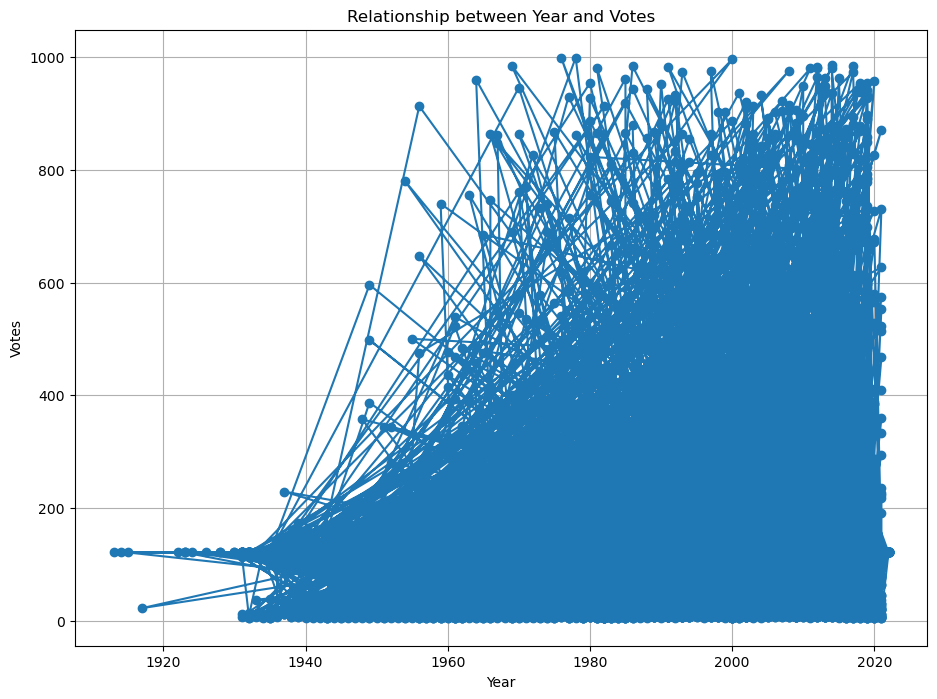

In [16]:
plt.figure(figsize=(11, 8))
plt.plot(df['Year'], df['Votes'], marker='o', linestyle='-')
plt.title('Relationship between Year and Votes')
plt.xlabel('Year')
plt.ylabel('Votes')
plt.grid(True)
plt.show()

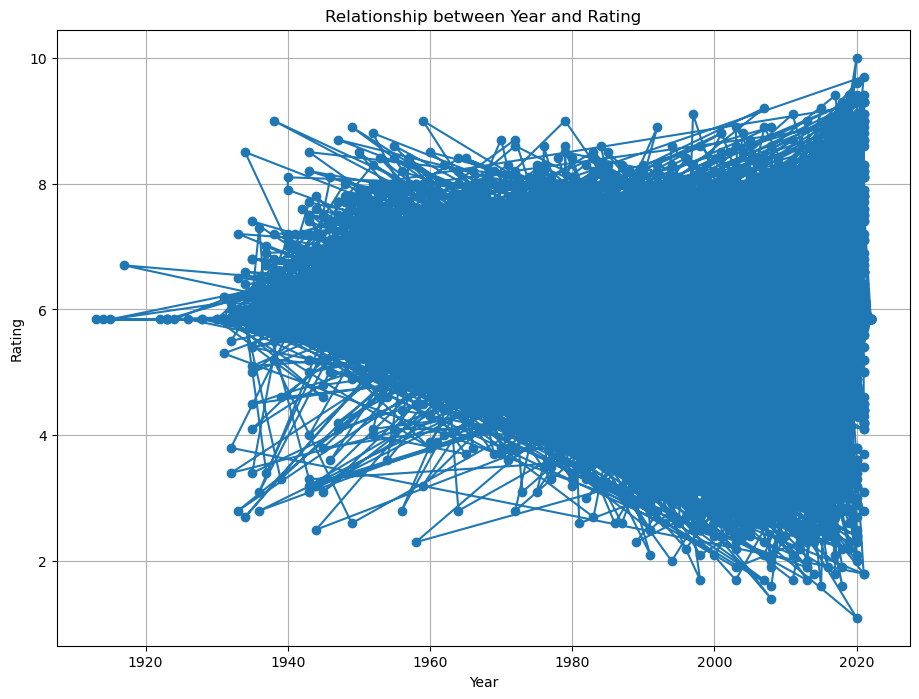

In [17]:
plt.figure(figsize=(11, 8))
plt.plot(df['Year'], df['Rating'], marker='o', linestyle='-')
plt.title('Relationship between Year and Rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [18]:
rating_by_year = df.groupby('Year')['Rating'].mean()
best_year = rating_by_year.idxmax()
best_rating = rating_by_year.max()
print(f"The year with the best rating is {best_year} with an average rating of {best_rating:.2f}")

The year with the best rating is 1917.0 with an average rating of 6.70


In [19]:
genre_c = df['Genre'].value_counts()
genre_avg_rate = df.groupby('Genre')['Rating'].mean()
best_rated_genre = genre_avg_rate.idxmax()
print("Genre with maximum average rating: ",best_rated_genre)

Genre with maximum average rating:  History, Romance


In [21]:
correl = df['Duration'].corr(df['Rating'])
print("Impact of movie length on rating: ", correl)

Impact of movie length on rating:  -0.01492054945473482


In [23]:
grp_year = df.groupby('Year')
top_10_per_yr = pd.DataFrame()
for year, group in grp_year:
    sorted_movies = group.sort_values(by='Rating', ascending=False)
    top_10_per_year = sorted_movies.head(10)
    top_10_per_yr = pd.concat([top_10_per_yr, top_10_per_year])
top_10_per_yr.reset_index(drop=True, inplace=True)
print("Top 10 movies per year:")
print(top_10_per_yr)
sorted_overall = df.sort_values(by='Rating', ascending=False)
top_10_overall = sorted_overall.head(10)
print("\nTop 10 movies overall:")
print(top_10_overall)

Top 10 movies per year:
                           Name    Year    Duration  \
0              Mohini Bhasmasur  1913.0  128.126519   
1              Satyavan Savitri  1914.0  128.126519   
2    Death of Narayanrao Peshwa  1915.0  128.126519   
3                   Lanka Dahan  1917.0  128.126519   
4                         Karna  1922.0  128.126519   
..                          ...     ...         ...   
929              Our Love Story  2022.0  128.126519   
930             Ponniyin Selvan  2022.0  128.126519   
931                      Salaar  2022.0  128.126519   
932            State vs Justice  2022.0  120.000000   
933                  The Intern  2022.0  128.126519   

                         Genre    Rating       Votes                 Director  \
0                          NaN  5.841621  120.839493  Dhundiraj Govind Phalke   
1                          NaN  5.841621  120.839493  Dhundiraj Govind Phalke   
2                          NaN  5.841621  120.839493      Shree Nath Pat

In [24]:
director_counts = df['Director'].value_counts()
most_movies_director = director_counts.idxmax()
print("Director who directed the most movies:", most_movies_director)
actors = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().reset_index(drop=True)
actor_counts = actors.value_counts()
most_movies_actor = actor_counts.idxmax()
print("Actor who starred in the most movies:", most_movies_actor)

Director who directed the most movies: Jayant Desai
Actor who starred in the most movies: Mithun Chakraborty


In [42]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Rating','Director','Actor 1','Actor 2','Actor 3','Name','Genre','Best_Rated_Genre','Best_Year','Best_Rating'])
y = df['Rating']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8934947400755461


In [44]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       15509 non-null  float64
 1   Duration                   15509 non-null  float64
 2   Votes                      15509 non-null  float64
 3   Movie_len_impct_on_Rating  15509 non-null  float64
dtypes: float64(4)
memory usage: 484.8 KB


In [47]:
new_data= pd.DataFrame({'Year':[2024], 'Duration':[94], 'Votes':[500], 'Movie_len_impct_on_Rating':[-0.01]})
predict_rating = rf_model.predict(new_data)
print("Rating: ", predict_rating)

Rating:  [6.29]
